# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import scipy.io.wavfile

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

In [3]:
sample_rate,file = scipy.io.wavfile.read('resources/train_whistle.wav')
print('Частота дискретизации:',sample_rate,'Гц')
print(file.dtype)
print('Глубина квантования: 16 бит')

Частота дискретизации: 8000 Гц
int16
Глубина квантования: 16 бит


### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

In [4]:
import IPython.display

In [5]:
m_v_rate,my_voice = scipy.io.wavfile.read('resources/my_voice.wav')
print('Частота дискретизации:',m_v_rate,'Гц')

Частота дискретизации: 44100 Гц


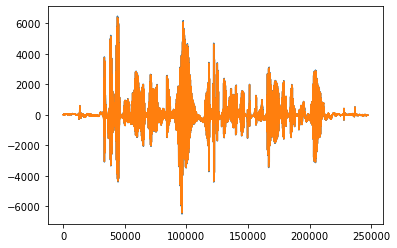

In [6]:
plt.plot(my_voice)
plt.show()

In [7]:
print('Оригинал моего голоса')
IPython.display.Audio('resources/my_voice.wav')

Оригинал моего голоса


Если честно, я немного не понял,требуется поменять частоту дискретизации при воспроизведение сигнала(т.е. просто замедлить его) или убрать какое-то количество отсчетов в исходном сигнале(как будто при записи исходного сигнала использовалась меньшая частота дискретизации). Сделаю оба варианта.

**Делаю скорость воспроизведения ниже**

In [8]:
def change_playing_rate(file,new_rate,data):
    scipy.io.wavfile.write('{}_{}_{}.{}'.format(file,int(new_rate),'p','wav'),int(new_rate),data)
    return IPython.display.Audio('{}_{}_{}.{}'.format(file,int(new_rate),'p','wav'))

При замедлении воспроизведения примерно в 5 раз уже станоновится невозможно различить человеческую речь

In [9]:
print('Мой голос, замедленный в 5 раза')
change_playing_rate('resources/my_voice',0.2*m_v_rate,my_voice)

Мой голос, замедленный в 5 раза


**Теперь поменяем частоту дискретизации при записи звука**

In [10]:
def change_recording_rate(file,r_m,rate,data): 
    assert type(r_m) == int #буду оставлять каждый r_m отсчет, остальные выбрасывать                      
    new_data = data[::r_m]       
    scipy.io.wavfile.write('{}_{}_{}.{}'.format(file,int(rate/r_m),'r','wav'),int(rate/r_m),new_data)
    return [IPython.display.Audio('{}_{}_{}.{}'.format(file,int(rate/r_m),'r','wav')), int(rate/r_m)]

Например, если оставлять каждый 2-й отсчет получится как-то так:

In [11]:
voice_2, rate_2 = change_recording_rate('resources/my_voice',2,m_v_rate,my_voice)
print('Частота дискретизации при записи: {} Гц'.format(rate_2))
voice_2

Частота дискретизации при записи: 22050 Гц


Разница с оригиналом не особо заметна. Вот, что будет, если оставлять каждый 10-й отсчет: 

In [12]:
voice_10, rate_10 = change_recording_rate('resources/my_voice',10,m_v_rate,my_voice)
print('Частота дискретизации при записи: {} Гц'.format(rate_10))
voice_10

Частота дискретизации при записи: 4410 Гц


Тут уже заметна потеря информации и искажение качества записи. В какой-то момент (когда оставляем каждый 15-й отсчет) утилита перестает воспроизводить файл. Но кажется, что если понизить частоту дискретизации при записи примерно до 735 Гц, то речь становится невозможно разобрать(этому соответствует файл 'resources/my_voice_735_r').

In [13]:
voice_60, rate_60 = change_recording_rate('resources/my_voice',60,m_v_rate,my_voice)
print('Частота дискретизации при записи: {} Гц'.format(rate_60))
voice_60

Частота дискретизации при записи: 735 Гц


Построим график для такого сигнала:

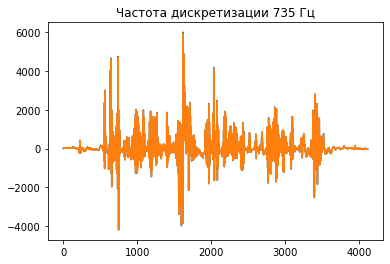

In [14]:
s_r,f = scipy.io.wavfile.read('resources/my_voice_735_r.wav')
plt.plot(f)
plt.title('Частота дискретизации {} Гц'.format(s_r))
plt.show()

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

В форматах **.mp3,.ogg** применяются алгоритмы сжатия, что ведет к уменьшению размера итогового файла, но при этом к потере информации. В формате **.wav** сжатие не применяется. Из-за этого при одинаковой глубине квантования и частоте дискретизации **.wav** файл будет занимать больше места, чем **.mp3**, но информация в нем будет меньше искажена.

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [15]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [16]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

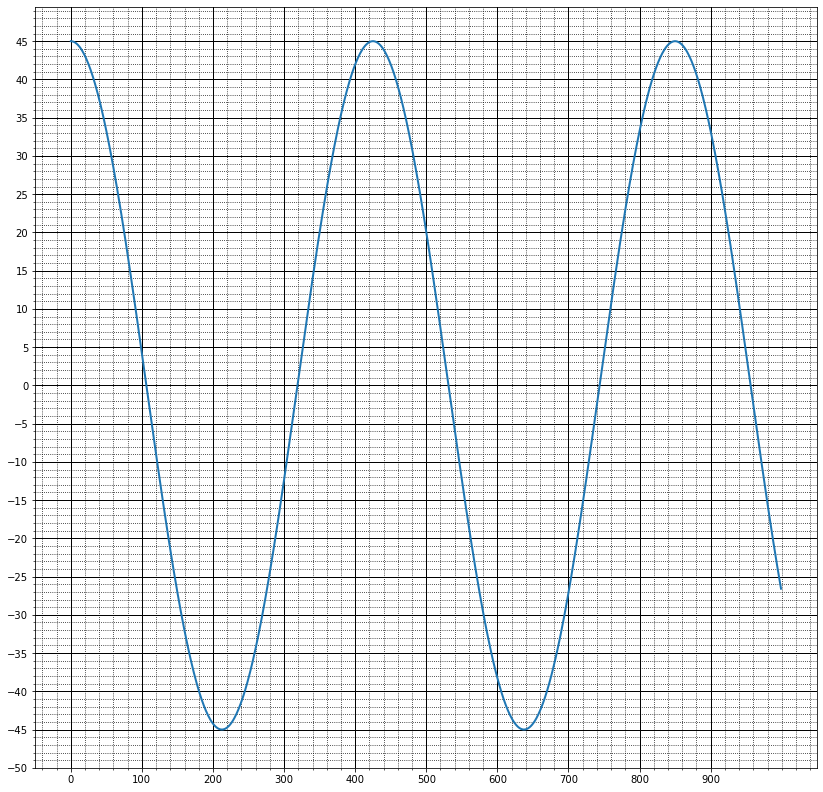

In [17]:
draw_signal(test_data['task2']['a'])

In [18]:
from scipy.fftpack import fft

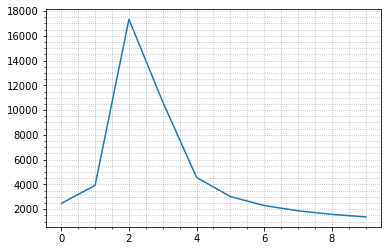

In [19]:
def draw_Fourie(data,figsize=(14,14),sz = 0,phase_plot=False):
    if not sz:
        sz = int(len(data)/2)
    data_F = fft(data)
    plt.plot(np.abs(data_F)[:sz])
    plt.minorticks_on()
    plt.grid(which='major',
                linestyle = ':'
               )
    plt.grid(which='minor',
                linestyle=':'
               )
    plt.show()
    if phase_plot:
        plt.figure()
        plt.plot(np.arctan(data_F.imag[:sz]/data_F.real[:sz]))
        plt.minorticks_on()
        plt.grid(which='major',
                linestyle = ':')
        plt.grid(which='minor',
                linestyle=':')
        plt.show()
    
draw_Fourie(test_data['task2']['a'],sz=10)

In [20]:
a = 45*np.cos(2.35*2*np.pi/1000*np.arange(0,1000,1))

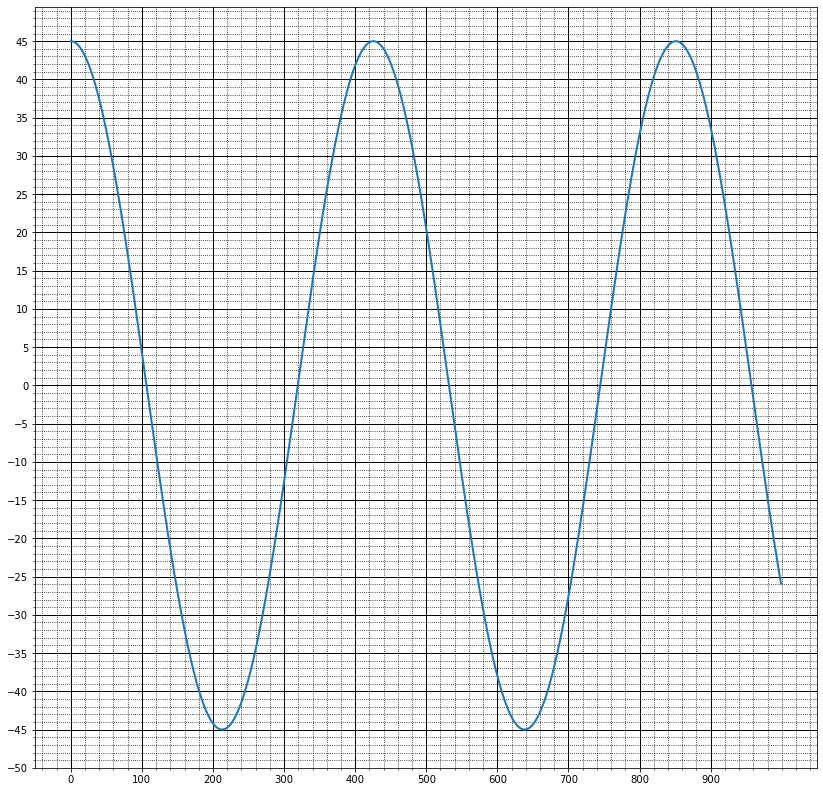

In [21]:
draw_signal(a)

In [22]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**
1. Амплитуда - $A = 45$
2. Угловая частота - $\displaystyle (\omega = \frac{2 \pi}{T}) = 14.77 $
3. Фаза - $\varphi=0$

### Сигнал ***b***

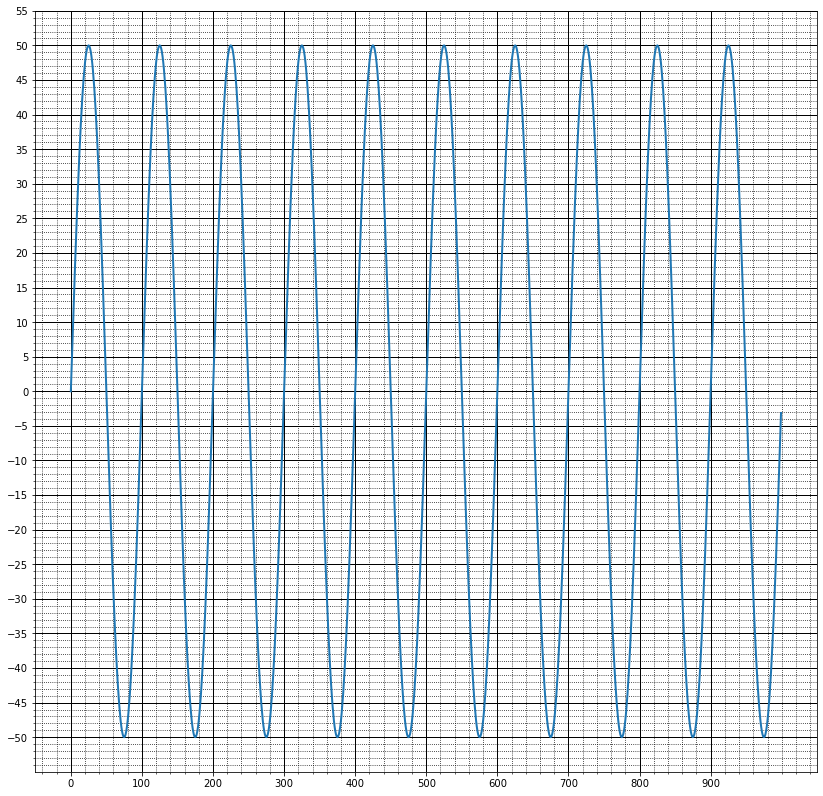

In [23]:
draw_signal(test_data['task2']['b'])

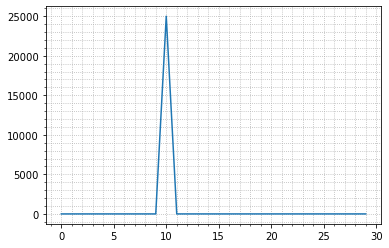

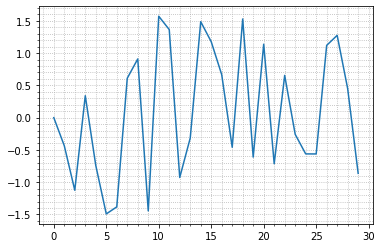

In [24]:
draw_Fourie(test_data['task2']['b'],sz=30,phase_plot=True)

In [25]:
b = -50*np.cos(10*2*np.pi/1000 *np.arange(0,1000,1) + np.pi/2)

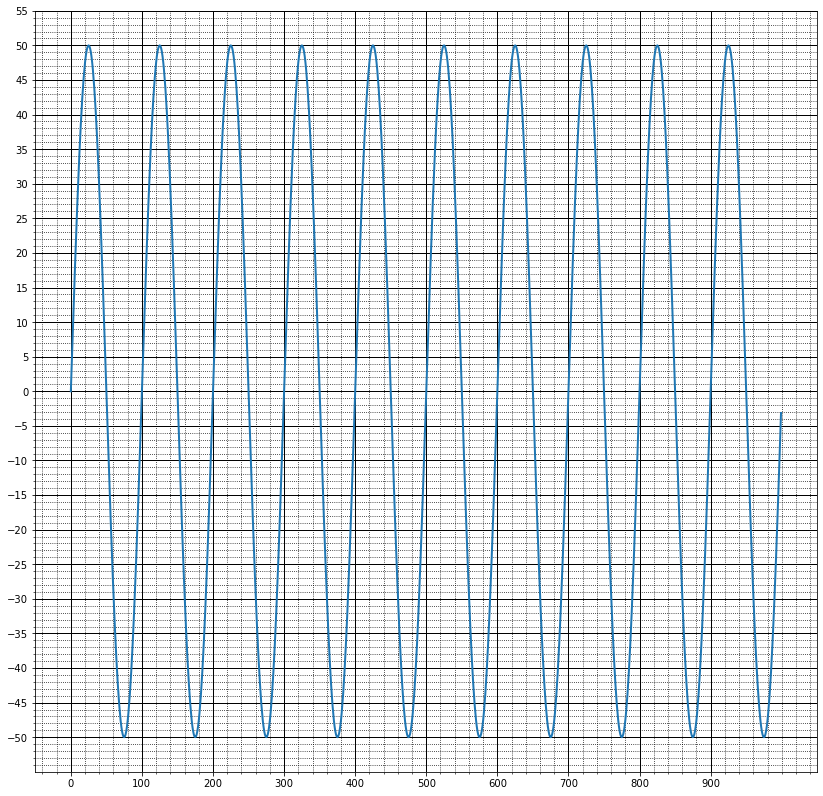

In [26]:
draw_signal(b)

In [27]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**
1. Амплитуда - $A = 50$
2. Угловая частота - $\displaystyle (\omega = \frac{2 \pi}{T}) = 10 $
3. Фаза - $\displaystyle \varphi= - \frac{\pi}{2}$

### Сигнал ***c***

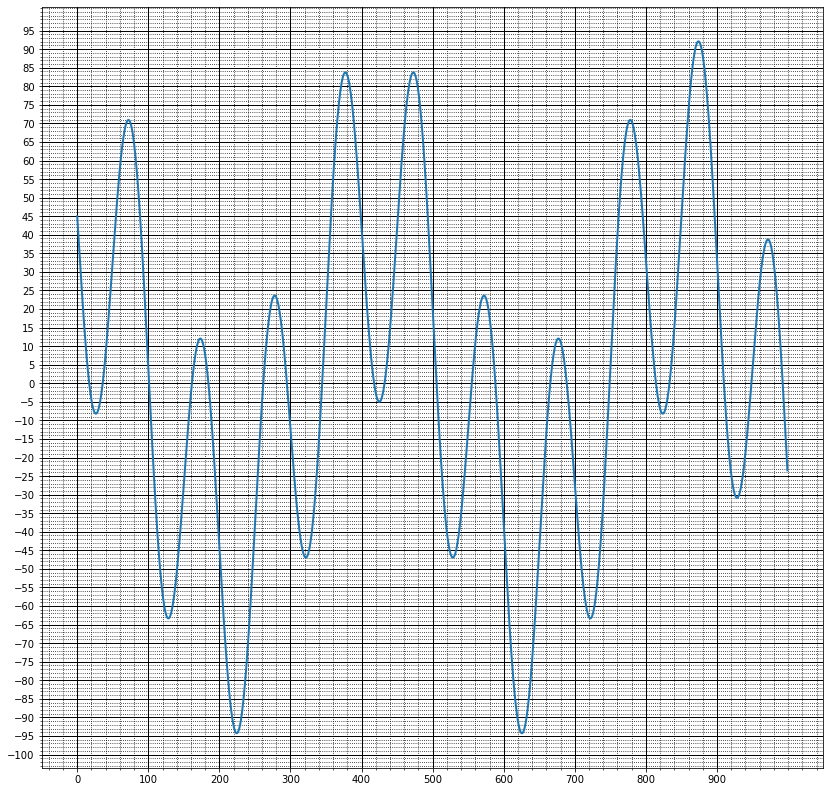

In [28]:
draw_signal(test_data['task2']['c'])

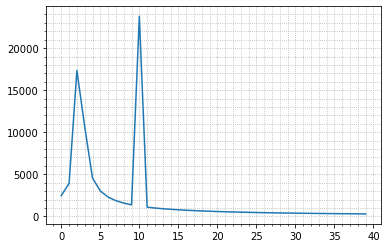

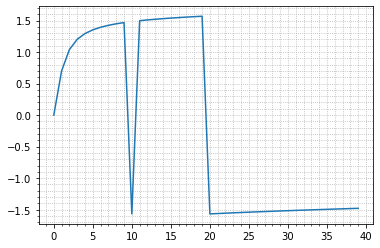

In [29]:
draw_Fourie(test_data['task2']['c'],sz=40,phase_plot=True)

In [30]:
c = 45*np.cos(2.35*2*np.pi/1000*np.arange(0,1000,1))-50*np.cos(10*2*np.pi/1000 *np.arange(0,1000,1) - np.pi/2)

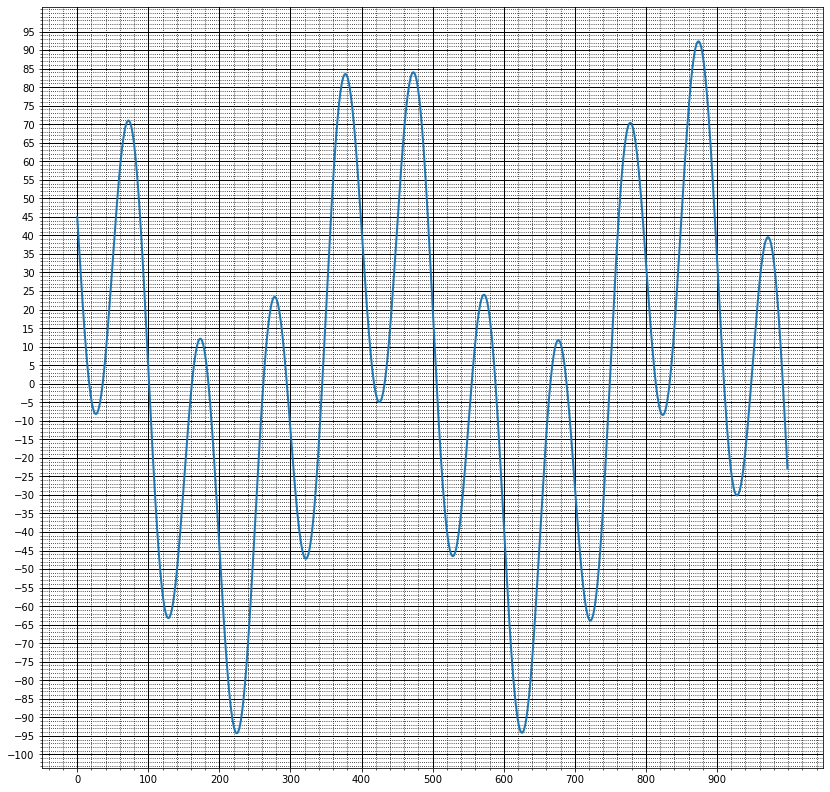

In [31]:
draw_signal(c)

In [32]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [33]:
import scipy.signal
import scipy.integrate

In [34]:
def convolve(func,filt):
    N = len(func)
    n = len(filt)
    f1 = np.zeros(3*N) 
    f1[N+1:N+n+1]= filt[:]
    return np.array([np.sum(func*f1[N+1+i:i+1:-1]) for i in range(N+n-1)])


In [35]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [36]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [37]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **a**

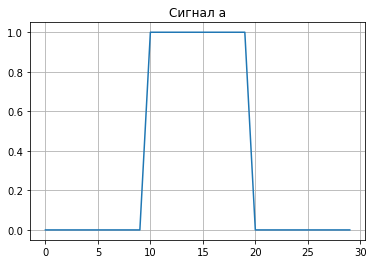

In [38]:
plt.plot(a)
plt.title('Сигнал a')
plt.grid()
plt.show()

Сигнал **b**

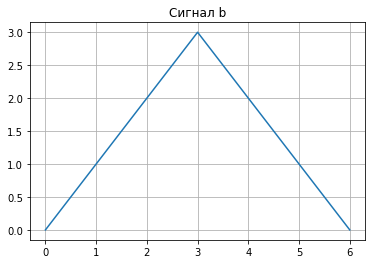

In [39]:
plt.plot(b)
plt.title('Сигнал b')
plt.grid()
plt.show()

Свертка **a** и **b**

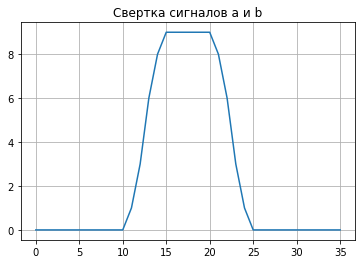

In [40]:
c = convolve(a,b)
plt.plot(c)
plt.title('Свертка сигналов a и b')
plt.grid()
plt.show()

Все три графика на одной картинке:

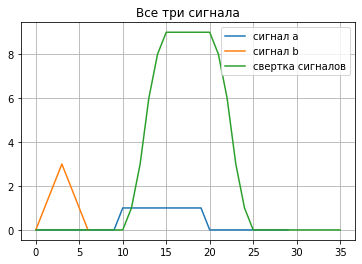

In [41]:
plt.plot(a,label = 'сигнал a')
plt.plot(b,label = 'сигнал b')
plt.plot(c,label = 'свертка сигналов')
plt.title('Все три сигнала')
plt.legend()
plt.grid()
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [42]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE

   

    raise NotImplementedError()

In [43]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

NotImplementedError: 

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [ ]:
# YOUR CODE HERE

Визуализируем затухание амплитуды:

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

In [ ]:
# YOUR CODE HERE